In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [3]:
# Importing Data File
data = pd.read_csv("voice-classification.csv", sep=',')
feature_columns = ['meanfreq','sd','median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'mode','sp.ent','sfm','centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom','dfrange','modindx']
X = data[feature_columns]
labels_true = data['label']

In [5]:
# K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels_pred = kmeans.labels_
rand_score = metrics.adjusted_rand_score(labels_pred, labels_true) 

# print np.unique(labels_pred) # Check the number of unique classes. Depends on how many clusters. 
print(rand_score)
print(kmeans.inertia_)

0.0011251181592670677
6815820.742069847


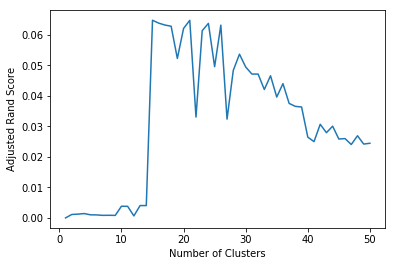

In [6]:
# trying to understnd how number of clusters affects Random Score
clusters = []
scores = []
for cluster in range(1,51):
    clusters.append(cluster)
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X)
    labels_pred = kmeans.labels_
    rand_score = metrics.adjusted_rand_score(labels_pred, labels_true)
    scores.append(rand_score)
    
plt.plot(clusters, scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Score")
plt.show()

In [7]:
# Runnig an SVM to 
clf = SVC()
scores = cross_val_score(clf, X, labels_true, cv=5)
print('Accuracy Score when using a SVM with no kernel is:' + str(scores.mean()))

C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base

Accuracy Score when using a SVM with no kernel is:0.6748452661422354


C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Balkrishna\Anaconda3\lib\site-packages\sklearn\svm\base

Accuracy Score when using a no kernel SVM and feature standardizing is:0.9677963902088408


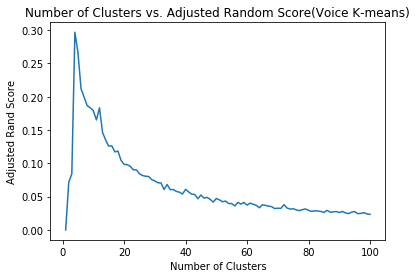

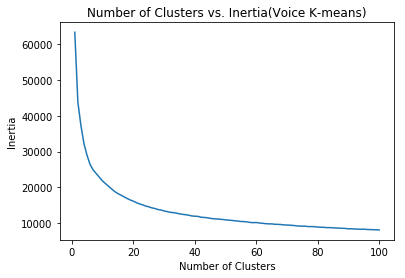

The best adjusted rand score is with 4 clusters.
The minimum inertia is with 100 clusters.


In [10]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)
scores = cross_val_score(clf, scaled_X, labels_true, cv=5)
print('Accuracy Score when using a no kernel SVM and feature standardizing is:' + str(scores.mean()))

clusters = []
scores = []
inertias = []
for cluster in range(1,101):
    clusters.append(cluster)
    kmeans = KMeans(n_clusters=cluster).fit(scaled_X)
    labels_pred = kmeans.labels_
    inertia = kmeans.inertia_
    inertias.append(inertia)
    rand_score = metrics.adjusted_rand_score(labels_pred, labels_true)
    scores.append(rand_score)
    
plt.plot(clusters, scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted Rand Score")
plt.title('Number of Clusters vs. Adjusted Random Score(Voice K-means)')
plt.savefig('number of cluters-vs-adjusted random score-Voice-Kmeans.png')
plt.show()

plt.plot(clusters, inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('Number of Clusters vs. Inertia(Voice K-means)')
plt.savefig('number of cluters-vs-inertia-Voice-Kmeans.png')
plt.show()

maximum_index = scores.index(max(scores))
print ("The best adjusted rand score is with " + str(clusters[maximum_index]) + " clusters.")

minimum_index_inertia = inertias.index(min(inertias))
print ("The minimum inertia is with " + str(clusters[minimum_index_inertia]) + " clusters.")


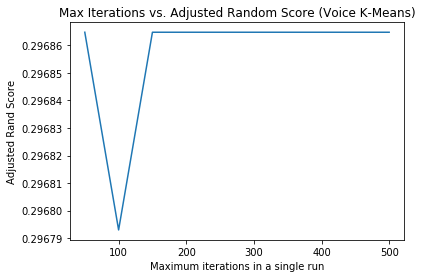

In [20]:
iterations = range(50, 550, 50)
scores = []

for iter in iterations:
    kmeans = KMeans(n_clusters=4, max_iter=iter).fit(scaled_X)
    labels_pred = kmeans.labels_
    rand_score = metrics.adjusted_rand_score(labels_pred, labels_true)
    scores.append(rand_score)
    
plt.plot(iterations, scores)
plt.xlabel("Maximum iterations in a single run")
plt.ylabel("Adjusted Rand Score")
plt.title('Max Iterations vs. Adjusted Random Score (Voice K-Means)')
plt.savefig('max iterations-vs-adjusted random score-Voice-KMeans.png')

In [24]:
import itertools

from scipy import linalg
import matplotlib as mpl
from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

def plot_results_EM(X, Y_, means, covariances, index, title):
    _, splot = plt.subplots(1, sharex=True)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], s=2,color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-3., 3.)
    #plt.ylim(-1., 6.)
    plt.title(title)
    plt.show()
    

def draw_kmeans(X, labels, centroids, clusters,title):
    _, ax1 = plt.subplots(1, sharex=True)
    for i in range(clusters):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
        ax1.scatter(ds[:,0],ds[:,1],s=1)
        # plot the centroids
        lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        plt.setp(lines,ms=15.0)
        plt.setp(lines,mew=2.0)
    plt.title(title)
    plt.savefig('Voice-K-Means-with-4 Clusters.png')
    plt.show()

0.4119173171508867


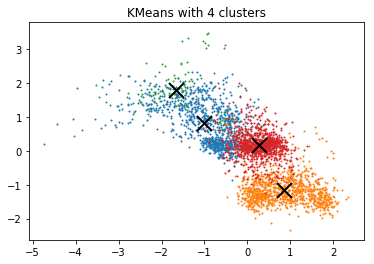

In [29]:
kmeans = KMeans(n_clusters=4).fit(scaled_X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(metrics.homogeneity_score(labels_true, labels))
draw_kmeans(scaled_X, labels, centroids, 4, "KMeans with 4 clusters")